<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/AutoEncoder%20mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(d_train, y_train), (d_test, Y_test) = mnist.load_data()
d_train.shape, y_train.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [ ]:
# input data를 생성한다.
x_train = d_train.reshape(-1, 784) / 255

n_input = x_train.shape[1]
n_feat = 200   # 784개 feature를 이만큼 줄인다.
n_output = n_input

In [ ]:
# FFN 모델을 생성한다.
x_input = Input(batch_shape=(None, n_input))
x_encoder = Dense(256, activation='relu')(x_input)
x_encoder = Dense(n_feat, activation='relu')(x_encoder)
y_encoder = Dense(256, activation='relu')(x_encoder)
y_decoder = Dense(n_output, activation='linear')(y_encoder)
model = Model(x_input, y_decoder) # 학습용
encoder = Model(x_input, x_encoder) # 중간 출력용
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 200)               51400     
                                                                 
 dense_5 (Dense)             (None, 256)               51456     
                                                                 
 dense_6 (Dense)             (None, 784)               201488    
                                                                 
Total params: 505,304
Trainable params: 505,304
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# autoencoder를 학습한다
# 입력과 출력이 동일하게 x_train을 학습시킨다. 
hist = model.fit(x_train, x_train, epochs=100, batch_size=100)

Epoch 1/100
600/600 [==============================] - 6s 5ms/step - loss: 0.0207
Epoch 2/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0091
Epoch 3/100
600/600 [==============================] - 3s 6ms/step - loss: 0.0076
Epoch 4/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0069
Epoch 5/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0065
Epoch 6/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0062
Epoch 7/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0061
Epoch 8/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0059
Epoch 9/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0059
Epoch 10/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0058
Epoch 11/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0057
Epoch 12/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0057
Epoch 13/100


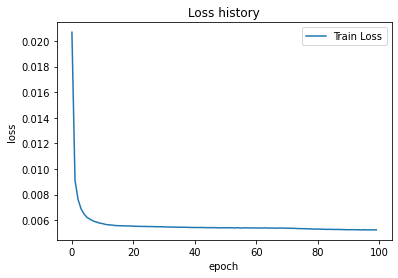

In [ ]:
# Loss history를 그린다.
plt.plot(hist.history['loss'], label='Train Loss')
plt.legend()
plt.title("Loss history")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
# 학습된 Autoencoder를 이용하여 입력 데이터의 차원을 축소한다.
x_encoded = encoder.predict(x_train)

In [ ]:
# K-means++ 알고리즘으로 차원이 축소된 이미지를 10 그룹으로 분류한다.
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, init='k-means++', n_init=3, max_iter=300, tol=1e-04, random_state=0)
km = km.fit(x_encoded)
clust = km.predict(x_encoded)

<Figure size 576x144 with 0 Axes>

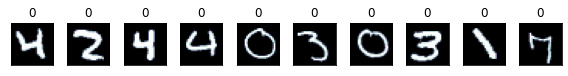

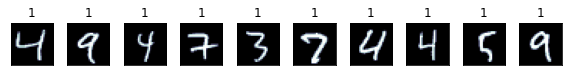

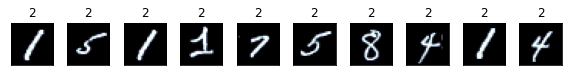

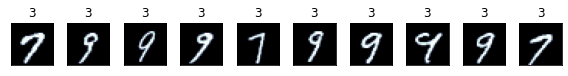

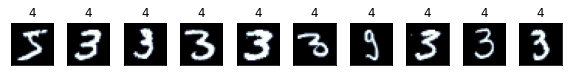

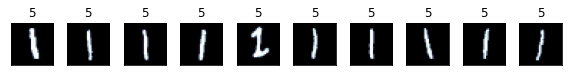

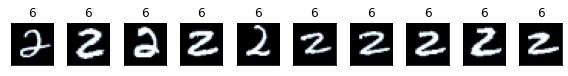

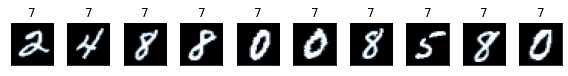

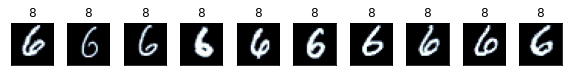

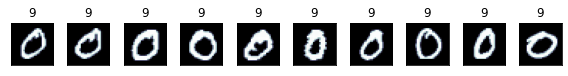

In [ ]:
# cluster 별로 이미지를 확인한다.
f = plt.figure(figsize=(8, 2))
for k in np.unique(clust):

  # cluster가 i 인 image 10개를 찾는다.
  idx = np.where(clust == k)[0][:10]

  f = plt.figure(figsize = (8,2))
  for i in range(10):
    image = x_train[idx[i]].reshape(28,28)
    ax = f.add_subplot(1, 10, i + 1)
    ax.imshow(image, cmap=plt.cm.bone)
    ax.grid(False)
    ax.set_title(k)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.tight_layout()
